In [1]:
import pandas as pd
import numpy as np
import model_creation as mc
import evaluation_model as em
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import all pre-processed data 

# Dataset WITHOUT Personal Information
X_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_xFeat.csv')
y_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_y.csv')
X_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_xFeat.csv')
y_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_y.csv')

# Dataset WITH Personal Information
X_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_xFeat.csv')
y_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_y.csv')
X_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_xFeat.csv')
y_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_y.csv')

# Building Datasets

#### Dataset 1 - including latitude and longitude

In [3]:
# Creating dataset with latitude and longitude
X_train_lat_long = X_train.copy()
y_train_lat_long = y_train_pi.copy()
X_test_lat_long = X_test.copy()
y_test_lat_long = y_test_pi.copy()

X_train_lat_long['lat'] = X_train_pi['lat']
X_train_lat_long['long'] = X_train_pi['long']
X_test_lat_long['lat'] = X_test_pi['lat']
X_test_lat_long['long'] = X_test_pi['long']

#### Dataset 2 - including year born

In [4]:
# Creating dataset with year born
X_train_year_born = X_train.copy()
y_train_year_born = y_train_pi.copy()
X_test_year_born = X_test.copy()
y_test_year_born = y_test_pi.copy()

X_train_year_born['year_born'] = X_train_pi['year_born']
X_test_year_born['year_born'] = X_test_pi['year_born']

#### Dataset 3 - including gender

In [5]:
# Creating dataset with gender
X_train_gender = X_train.copy()
y_train_gender = y_train_pi.copy()
X_test_gender = X_test.copy()
y_test_gender = y_test_pi.copy()

X_train_gender['gender'] = X_train_pi['gender']
X_test_gender['gender'] = X_test_pi['gender']


#### Dataset 4 - including job

In [6]:
# Creating dataset with jobs
X_train_job = X_train.copy()
y_train_job = y_train_pi.copy()
X_test_job = X_test.copy()
y_test_job = y_test_pi.copy()

X_train_job['job'] = X_train_pi['job']
X_test_job['job'] = X_test_pi['job']

# Building Decision Trees

In [7]:
# Finding the optimal parameters for the decision tree classifier using the total dataset WITH personal information.
optimal_params, results = mc.Decision_Tree(X_train_pi, y_train_pi.values.ravel())

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [8]:
# Building Base Decision Tree on complete dataset (i.e. with personal information)
DT_base, time_elapsed_DT_base = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_pi, y_train_pi.values.ravel())

In [9]:
# Building Decision Tree fitted on NO PI dataset
DT_no_pi, time_elapsed_DT_no_pi = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train, y_train.values.ravel())

In [10]:
# Building Decision Tree on Dataset 1 - NO PI but w/ lat and long
DT_lat_long, time_elapsed_lat_long = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_lat_long, y_train_lat_long.values.ravel())

In [11]:
# Building Decision Tree on Dataset 2 - NO PI but w/ year_born
DT_year_born, time_elapsed_year_born = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_year_born, y_train_year_born.values.ravel())

In [12]:
# Building Decision Tree on Dataset 3 - NO PI but w/ gender
DT_gender, time_elapsed_gender = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_gender, y_train_gender.values.ravel())

In [13]:
# Building Decision Tree on Dataset 4 - NO PI but w/ jobs
DT_jobs, time_elapsed_jobs = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_job, y_train_job.values.ravel())

# Predictions for Decision Trees

In [14]:
# Predictions for Base Decision Tree
DT_base_predict = DT_base.predict(X_test_pi)

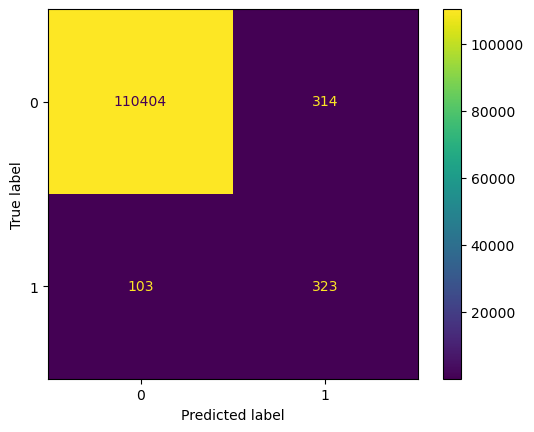

In [15]:
confusion_matrix = confusion_matrix(y_test_pi, DT_base_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=[0,1])
cm_display.plot()
plt.show()

In [16]:
# Predictions for Decision Tree fitted on NO PI dataset
DT_no_pi_predict = DT_no_pi.predict(X_test)

In [17]:
# Predictions for Decision Tree fitted on Dataset 1
DT_lat_long_predict = DT_lat_long.predict(X_test_lat_long)

In [18]:
# Predictions for Decision Tree fitted on Dataset 2
DT_year_born_predict = DT_year_born.predict(X_test_year_born)

In [19]:
# Predictions for Decision Tree fitted on Dataset 3
DT_gender_predict = DT_gender.predict(X_test_gender)

In [20]:
# Predictions for Decision Tree fitted on Dataset 4
DT_jobs_predict = DT_jobs.predict(X_test_job)

# Accuracy for Decision Trees

In [21]:
# Accuracy for Base Decision Tree
acc_base, base_roc = em.eval_model(DT_base, X_test_pi, y_test_pi.values.ravel(), DT_base_predict, time_elapsed_DT_base)
acc_base

{'AUC': 0.8776899642767095,
 'AUPRC': 0.38539102061626757,
 'F1': 0.6077140169332078,
 'Accuracy': 0.9962481105592744,
 'Time': 2.4548512500005018}

In [36]:
base_roc

{'fpr': array([0.        , 0.00283603, 1.        ]),
 'tpr': array([0.        , 0.75821596, 1.        ])}

In [22]:
# Accuracy for NO PI Decision Tree
acc_no_pi, no_pi_roc = em.eval_model(DT_no_pi, X_test, y_test.values.ravel(), DT_no_pi_predict, time_elapsed_DT_no_pi)
acc_no_pi

{'AUC': 0.8546850022986963,
 'AUPRC': 0.28138057836485375,
 'F1': 0.5066666666666666,
 'Accuracy': 0.99467357662132,
 'Time': 1.730449957998644}

In [23]:
# Accuracy for decision tree based on Dataset 1
acc_lat_long, lat_long_roc = em.eval_model(DT_lat_long, X_test_lat_long, y_test_lat_long.values.ravel(), DT_lat_long_predict, time_elapsed_lat_long)
acc_lat_long

{'AUC': 0.8796436015976639,
 'AUPRC': 0.20201817404518468,
 'F1': 0.3906810035842294,
 'Accuracy': 0.9908227164759231,
 'Time': 2.3581477500010806}

In [24]:
# Accuracy for decision tree based on Dataset 2
acc_year_born, year_born_roc = em.eval_model(DT_year_born, X_test_year_born, y_test_year_born.values.ravel(), DT_year_born_predict, time_elapsed_year_born)
acc_year_born

{'AUC': 0.9003589841705023,
 'AUPRC': 0.2541903706300406,
 'F1': 0.4517399868680237,
 'Accuracy': 0.9924872237817606,
 'Time': 1.5545823749998817}

In [25]:
# Accuracy for decision tree based on Dataset 3
acc_gender, gender_roc = em.eval_model(DT_gender, X_test_gender, y_test_gender.values.ravel(), DT_gender_predict, time_elapsed_gender)
acc_gender

{'AUC': 0.8774727521181206,
 'AUPRC': 0.26140666620787023,
 'F1': 0.4723032069970845,
 'Accuracy': 0.993485928165263,
 'Time': 1.5613683750016207}

In [26]:
# Accuracy for decision tree based on Dataset 4
acc_jobs, jobs_roc = em.eval_model(DT_jobs, X_test_job, y_test_job.values.ravel(), DT_jobs_predict, time_elapsed_jobs)
acc_jobs

{'AUC': 0.881075166474197,
 'AUPRC': 0.2705008783973823,
 'F1': 0.48194546794399407,
 'Accuracy': 0.9936748722378176,
 'Time': 1.8131944579981791}

In [27]:
optimal_params

{'max_depth': 55,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

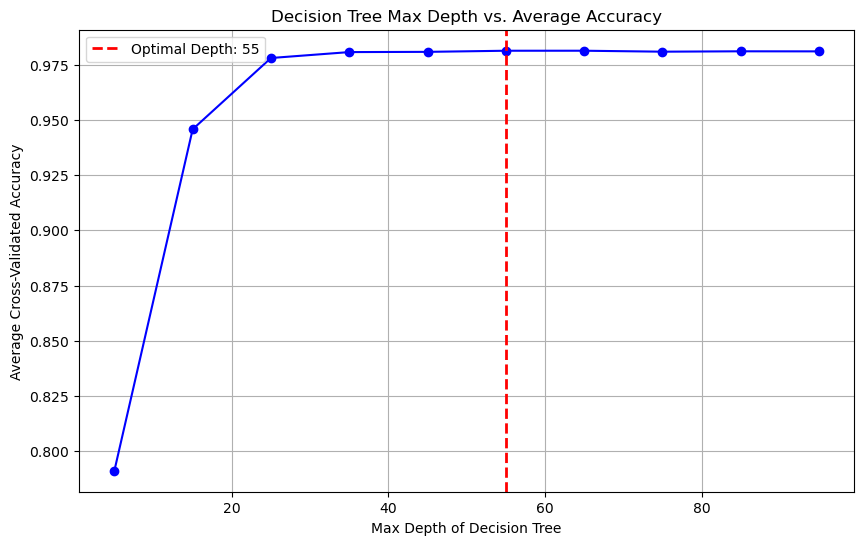

In [28]:
# Max tree depth Vs Average Accuracy
optimal_depth = optimal_params['max_depth']
results_df = pd.DataFrame(results)
mean_test_scores = results_df.groupby('param_max_depth')['mean_test_score'].mean().reset_index()
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(mean_test_scores['param_max_depth'], mean_test_scores['mean_test_score'], marker='o', linestyle='-', color='blue')
plt.axvline(x=optimal_depth, color='red', linestyle='--', linewidth=2, label=f'Optimal Depth: {optimal_depth}')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Average Cross-Validated Accuracy')
plt.title('Decision Tree Max Depth vs. Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

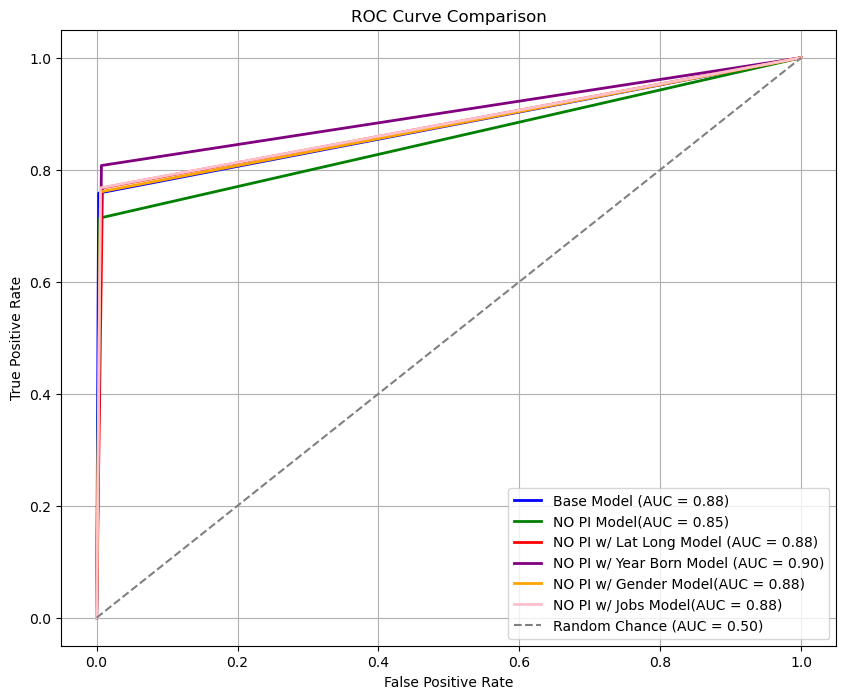

In [29]:
# ROC curve
base_auc = acc_base['AUC']
no_pi_auc = acc_no_pi['AUC']
lat_long_auc = acc_lat_long['AUC']
year_born_auc = acc_year_born['AUC']
gender_auc = acc_gender['AUC']
jobs_auc = acc_jobs['AUC']

plt.figure(figsize=(10, 8))
plt.plot(base_roc['fpr'], base_roc['tpr'], label=f'Base Model (AUC = {base_auc:.2f})', color='blue', linewidth=2)
plt.plot(no_pi_roc['fpr'], no_pi_roc['tpr'], label=f'NO PI Model(AUC = {no_pi_auc:.2f})', color='green', linewidth=2)
plt.plot(lat_long_roc['fpr'], lat_long_roc['tpr'], label=f'NO PI w/ Lat Long Model (AUC = {lat_long_auc:.2f})', color='red', linewidth=2)
plt.plot(year_born_roc['fpr'], year_born_roc['tpr'], label=f'NO PI w/ Year Born Model (AUC = {year_born_auc:.2f})', color='purple', linewidth=2)
plt.plot(gender_roc['fpr'], gender_roc['tpr'], label=f'NO PI w/ Gender Model(AUC = {gender_auc:.2f})', color='orange', linewidth=2)
plt.plot(jobs_roc['fpr'], jobs_roc['tpr'], label=f'NO PI w/ Jobs Model(AUC = {jobs_auc:.2f})', color='pink', linewidth=2)
plt.plot([0, 1], [0, 1], label='Random Chance (AUC = 0.50)', color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

# Feature Importance for Datasets

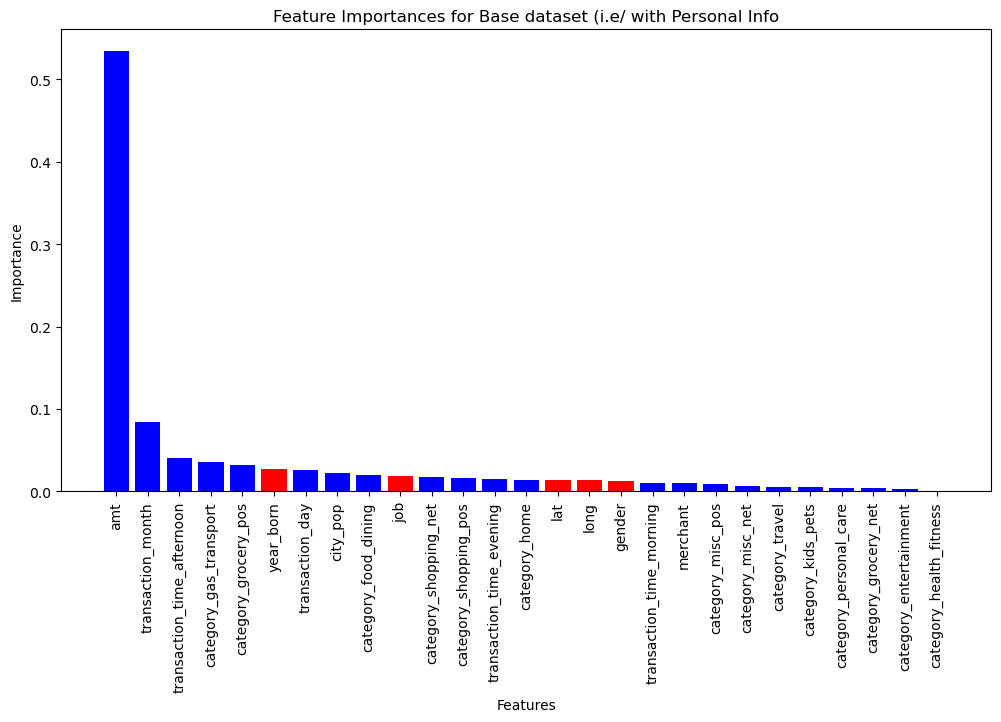

In [30]:
# Finding the important features from base dataset
base_model_imp = DT_base.feature_importances_

# Plotting the feature importance for base model
feature_names = X_train_pi.columns
indices = np.argsort(base_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Base dataset (i.e/ with Personal Info")
plt.bar(range(len(base_model_imp)), base_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(base_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

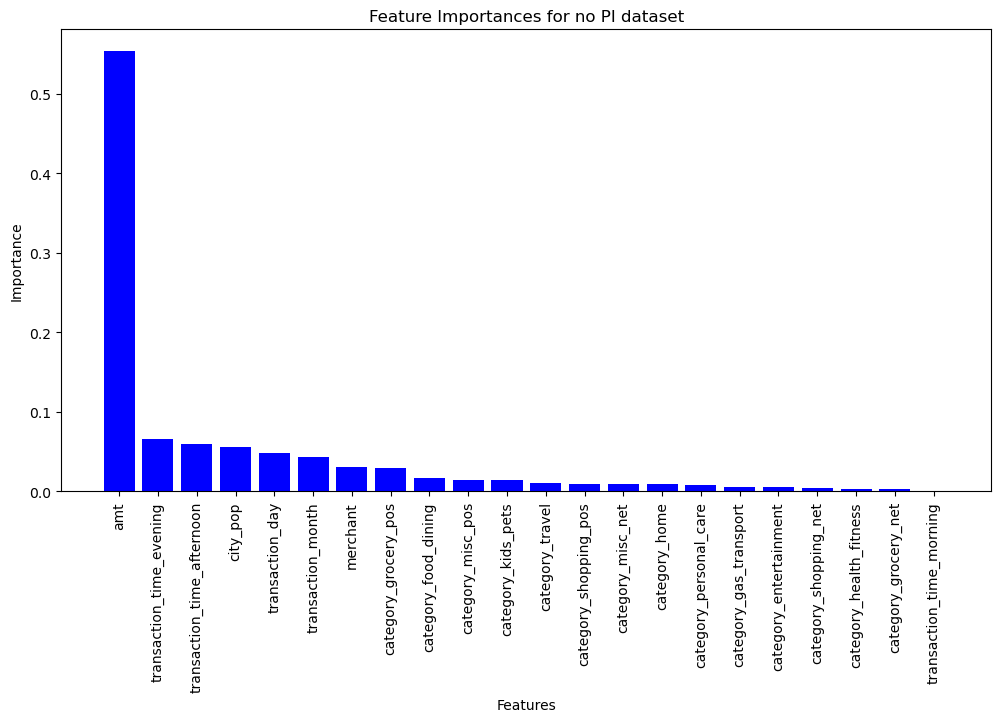

In [31]:
# Finding the important features from NO PI dataset
no_pi_model_imp = DT_no_pi.feature_importances_

# Plotting the feature importance for model with NO PI dataset
feature_names = X_train.columns
indices = np.argsort(no_pi_model_imp)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for no PI dataset")
plt.bar(range(len(no_pi_model_imp)), no_pi_model_imp[indices], color="b", align="center")
plt.xticks(range(len(no_pi_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

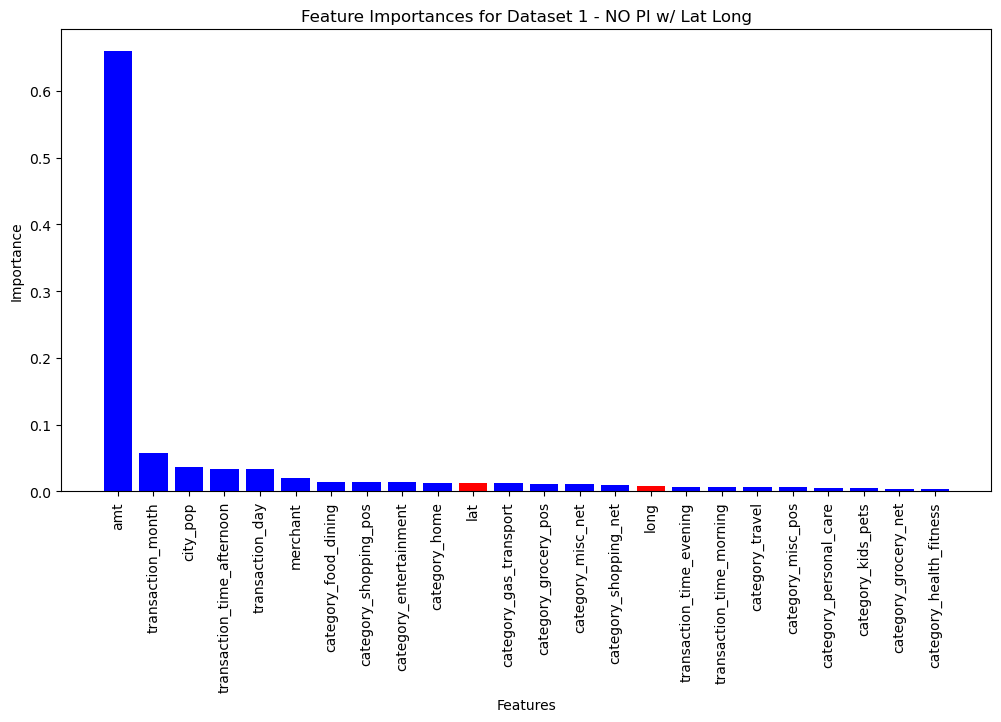

In [32]:
# Finding the important features from Dataset 1 - NO PI w/ lat long
lat_long_model_imp = DT_lat_long.feature_importances_

# Plotting the feature importance for model with dataset 1
feature_names = X_train_lat_long.columns
indices = np.argsort(lat_long_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 1 - NO PI w/ Lat Long")
plt.bar(range(len(lat_long_model_imp)), lat_long_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(lat_long_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

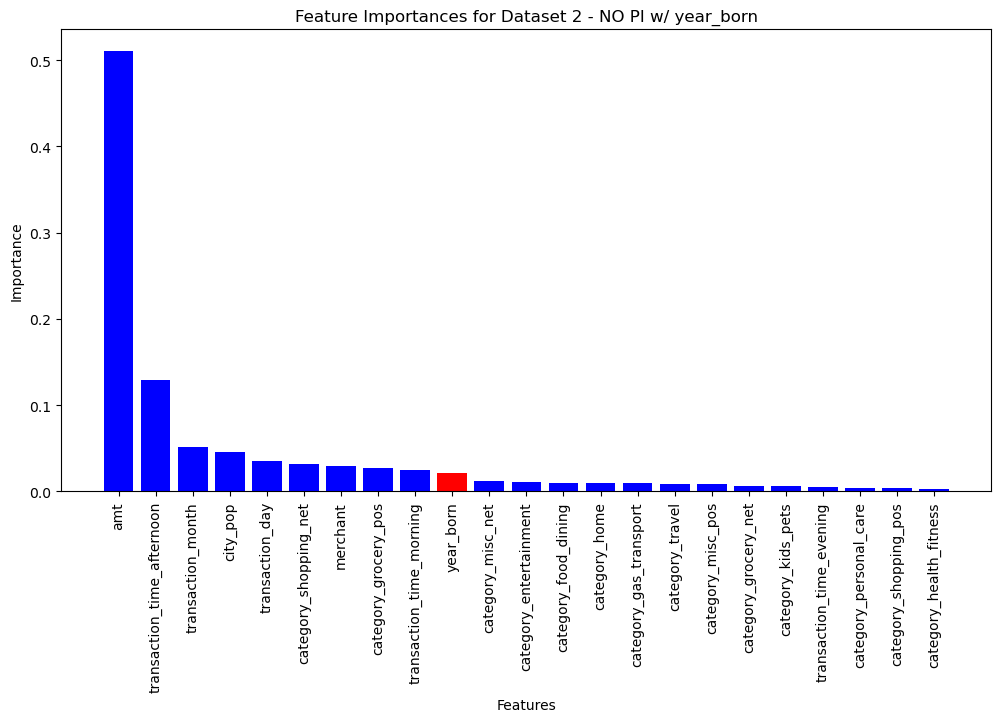

In [33]:
# Finding the important features from Dataset 2 - NO PI w/ year_born
year_born_model_imp = DT_year_born.feature_importances_

# Plotting the feature importance for model with datast 2
feature_names = X_train_year_born.columns
indices = np.argsort(year_born_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 2 - NO PI w/ year_born")
plt.bar(range(len(year_born_model_imp)), year_born_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(year_born_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

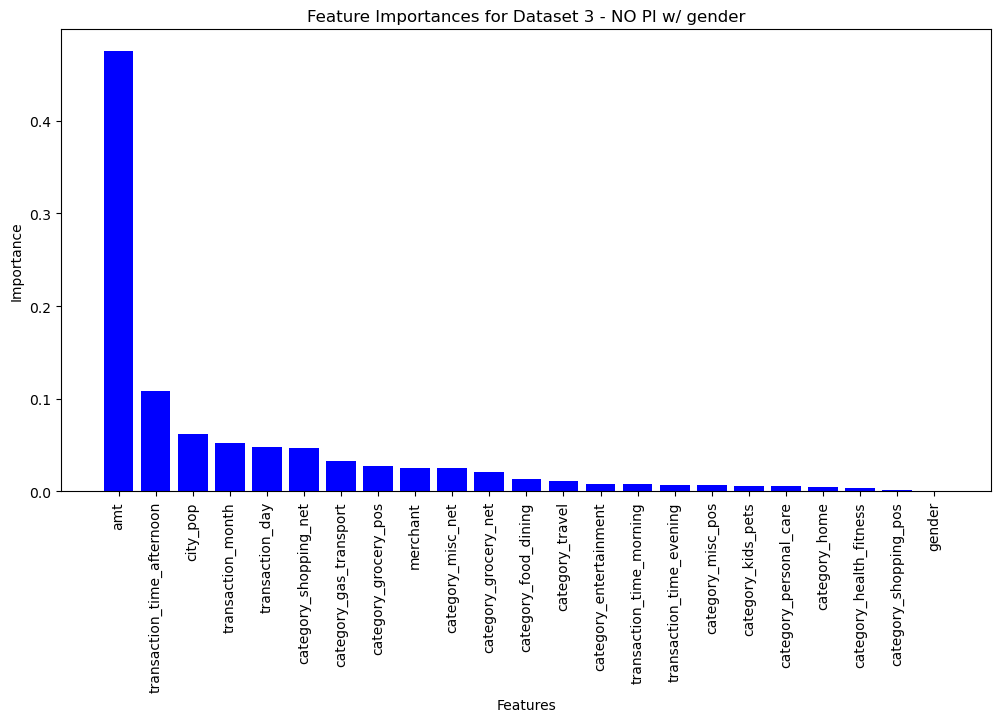

In [34]:
# Finding the important features from Dataset 3 - NO PI w/ gender
gender_model_imp = DT_gender.feature_importances_

# Plotting the feature importance for model with dataset 3
feature_names = X_train_gender.columns
indices = np.argsort(gender_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 3 - NO PI w/ gender")
plt.bar(range(len(gender_model_imp)), gender_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(gender_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

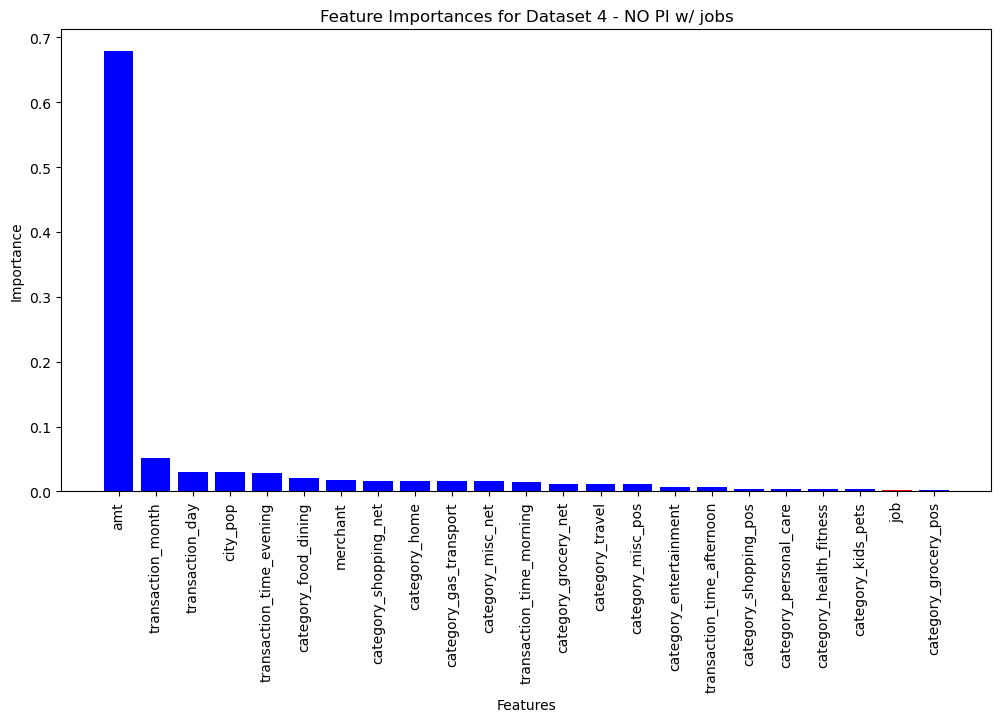

In [35]:
# Finding the important features from Dataset 4 - NO PI w/ jobs
jobs_model_imp = DT_jobs.feature_importances_

# Plotting the feature importance for model with dataset 4
feature_names = X_train_job.columns
indices = np.argsort(jobs_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 4 - NO PI w/ jobs")
plt.bar(range(len(jobs_model_imp)), jobs_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(jobs_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()